# <center>CSCI 2820 - Linear Algebra</center>
### <center>Exam 3 - Take home</center>
### <center>Total points: 100</center>
### <center>Due:  **Monday, 7th August 2023, 11:59 PM MDT**<center>

Instructions:
1. Please refrain from using the Internet, StackOverflow, or ChatGPT. Think critically and solve problems independently. Your growth and learning depend on it. Thank you!
2. There are a few example problems at each topic heading, which is basically a review of the questions you must answer.
3. No late submissions and excuses are allowed.
4. GOOD LUCK!

## Section A: Orthogonalization

Some of the most important applications of inner products involve finding and using sets of vectors that are mutually orthogonal.  A set of nonzero vectors $\{U_1, U_2, U_3 ... U_n\}$ is **mutually orthogonal** if $U_i\cdot U_j = 0$ whenever $i \neq j$.  This simply means that every vector in the set is orthogonal to every other vector in the set.  If a set of vectors is mutually orthogonal *and* every vector in the set is a *unit vector*, we say the set is **orthonormal**.  In other words, every vector in an orthonormal set has magnitude one, and is orthogonal to every other vector in the set.  

Orthonormal sets must be linearly independent, so it makes sense to think of them as a basis for some vector subspace.  Any collection of vectors from the standard bases of $\mathbb{R}^n$ are orthonormal sets.  For example, the set of vectors $\{E_1, E_4, E_5\}$ from the standard basis of $\mathbb{R}^5$ forms a orthonormal basis for a subspace of $\mathbb{R}^5$.


$$
\begin{equation}
E_1 = \left[ \begin{array}{r} 1\\0\\0\\0\\0 \end{array}\right] \hspace{0.7cm} 
E_4 = \left[ \begin{array}{r} 0\\0\\0\\1\\0 \end{array}\right] \hspace{0.7cm}
E_5 = \left[ \begin{array}{r} 0\\0\\0\\0\\1 \end{array}\right] \hspace{0.7cm}
\end{equation}
$$

In this section we will focus on a process called orthogonalization.  Given a set of linearly independent vectors  $\{V_1, V_2, V_3 ... V_n\}$, we wish to find an orthonormal set of vectors  $\{U_1, U_2, U_3 ... U_n\}$ such that the span of  $\{U_1, U_2, U_3 ... U_n\}$ is the same as the span of  $\{V_1, V_2, V_3 ... V_n\}$.  In other words, we want both sets to be bases for the same subspace.

One of the primary advantages of using orthonormal bases is that the calculation of [coordinate vectors](Bases.ipynb) is greatly simplified.  Recall that if we have a typical basis $\beta = \{V_1, V_2, V_3 ... V_n\}$ for a subspace $\mathcal{V}$, and a vector $X$ in $\mathcal{V}$, the coordinates with respect to $\beta$ are the values of $c_1$, $c_2$, ... ,$c_n$ such that
$X = c_1V_1 + c_2V_2 + ... c_nV_n$.  This requires that we solve the linear system $A[X]_{\beta}=X$, where $A$ is the matrix that has the basis vectors as its columns, and $[X]_\beta$ is the coordinate vector.  If instead we have an orthonormal basis $\alpha = \{U_1, U_2, U_3 ... U_n\}$ for $\mathcal{V}$, there is a convenient shortcut to solving $X = b_1U_1 + b_2U_2 + ... b_nU_n$.  Let's observe the result of taking the dot product of both sides of this equation with $U_k$.

$$
\begin{eqnarray}
X\cdot U_k & = & (b_1U_1 + b_2U_2 + ... b_nU_n)\cdot U_k \\
 & = & b_1(U_1\cdot U_k) + b_2(U_2\cdot U_k) + ... b_n(U_n\cdot U_k) \\
 & = & b_k 
\end{eqnarray}
$$

All of the products $U_i\cdot U_k$ are zero except for $U_k\cdot U_k$, which is one.  This means that instead of solving a system to find the coordinates, we can compute each $b_k$ directly, as the dot product $X\cdot U_k$. 

### Projecting vectors onto vectors

An important step in orthogonalization involves decomposing a vector $B$ into orthogonal components based on the direction of another vector $V$.  Specifically, we want to determine two vectors, $\hat{B}$ and $E$, such that $\hat{B}$ is in the same direction as $V$, $E$ is orthogonal to $V$, and $B = \hat{B} + E$.

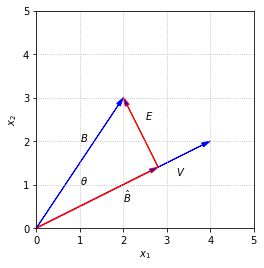

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

ax.arrow(0,0,2,3,fc='b',ec='b',**options)
ax.arrow(0,0,4,2,fc='b',ec='b',**options)
ax.arrow(0,0,2.8,1.4,fc='b',ec='r',**options)
ax.arrow(2.8,1.4,-0.8,1.6,fc='b',ec='r',**options)

ax.text(1,2,'$B$')
ax.text(3.2,1.2,'$V$')
ax.text(2,0.6,'$\hat{B}$')
ax.text(2.5,2.5,'$E$')
ax.text(1,1,'$\\theta$')


ax.set_xlim(0,5)
ax.set_xlabel('$x_1$')
ax.set_ylim(0,5)
ax.set_ylabel('$x_2$')
ax.set_aspect('equal')

ax.grid(True,ls=':')

The vector $\hat{B}$ is said to be the **projection** of $B$ in the direction of $V$.

To find the magnitude of $\hat{B}$, we can use the definition of cosine to write $||\hat{B}|| = ||B||\cos{\theta}$.  We also know that $\cos{\theta}$ can be determined using the dot product.


$$
\begin{equation}
\cos{\theta} = \frac{B\cdot V}{||B||||V||}
\end{equation}
$$

Combining these facts gives us $||\hat{B}||$.

$$
\begin{equation}
||\hat{B}|| = \frac{B\cdot V}{||V||} 
\end{equation}
$$

We can now construct $\hat{B}$ by multiplying $||\hat{B}||$ by a unit vector in the direction of $V$


$$
\begin{equation}
\hat{B} = \frac{B\cdot V}{||V||}\left(\frac{V}{||V||}  \right)  
\end{equation}
$$

Finally, we can give a tidy formula by writing $||V||^2$ using the dot product.


$$
\begin{equation}
\hat{B} = \left(\frac{B\cdot V}{V\cdot V}\right) V 
\end{equation}
$$

In [2]:
import numpy as np
from laguide import DotProduct
from laguide import Magnitude

B = np.array([[2],[3]])
V = np.array([[4],[2]])

k = DotProduct(B,V)/DotProduct(V,V)

B_hat = k*V

print(B_hat)

[[2.8]
 [1.4]]


The easiest way to calculate $E$ is to first find $\hat{B}$, then set $E = B - \hat{B}$.

In [3]:
E = B - B_hat
print(E)

[[-0.8]
 [ 1.6]]


If the calculations are correct, we should see that $\hat{B}$ and $E$ are orthogonal.

In [4]:
print(DotProduct(B_hat,E))

4.440892098500626e-16


We see in fact that the computed value of $\hat{B}\cdot E$ is not *exactly* zero due to the imprecision of the machine arithmetic.  This is very similar to some of the results we observed when performing elimination numerically, and we must keep in mind the potential for such errors.  

We also note that the formula derived here for $\hat{B}$ works for vectors of any dimension.  If $B$ and $V$ are vectors in $\mathbb{R}^n$, they still occupy a common plane, and the picture looks just the same as the one above regardless of the fact that the plane sits in a higher dimensional space.

### Gram-Schmidt algorithm

Given a set of linearly independent vectors  $\{V_1, V_2, V_3 ... V_n\}$, the **Gram-Schmidt algorithm** produces an orthonormal set of vectors $\{U_1, U_2, U_3 ... U_n\}$ such that the span of  $\{U_1, U_2, U_3 ... U_n\}$ is the same as the span of  $\{V_1, V_2, V_3 ... V_n\}$.  The idea is to build up the set of $U$ vectors one at a time, while ensuring that each new vector $U_i$ that is added is orthogonal to all vectors already in the set.  These vectors are constructed by selecting a vector from the $V$ set, and subtracting the components that are in the directions of any vectors already in the $U$ set.  The $U$ vectors can be scaled to unit length as part of the process, or they can all be scaled at the end.

We write the algorithm in steps before providing an example.

1. $V_1$ is scaled to unit length and becomes $U_1$.
2. The projection of $V_2$ in the direction of $U_1$ is subtracted from $V_2$.  The resulting vector is scaled to unit length and becomes $U_2$.
3. The projections of $V_3$ in the directions of $U_1$ and $U_2$ are subtracted from $V_3$.  The resulting vector is scaled to unit length and becomes $U_3$.  
4. Continue applying a similar procedure for all $n$ vectors.  In general, the projections of $V_k$ in the directions of $U_1$, $U_2$, ...$U_{k-1}$ are subtracted from $V_k$ and the resulting vector is scaled to unit length to become $U_k$.  


### Example 1:  Applying the Gram-Schmidt algorithm

As a first example, we take three vectors from $\mathbb{R}^3$ as the starting set, and use Python to carry out the calculations.

$$
\begin{equation}
V_1 = \left[ \begin{array}{r} 1 \\ 2 \\ 0 \end{array}\right] \hspace{0.7cm} 
V_2 = \left[ \begin{array}{r} 1 \\ 1 \\ 1 \end{array}\right] \hspace{0.7cm}
V_3 = \left[ \begin{array}{r} 3 \\ 0 \\ 1 \end{array}\right] \hspace{0.7cm}
\end{equation}
$$

The first vector, $V_1$ is scaled to unit legth to become $U_1$

In [5]:
V_1 = np.array([[1],[2],[0]])
V_2 = np.array([[1],[1],[1]])
V_3 = np.array([[3],[0],[1]])

U_1 = V_1/Magnitude(V_1)
print(U_1)

[[0.4472136 ]
 [0.89442719]
 [0.        ]]


To build $U_2$, we first subtract from $V_2$ the projection of $V_2$ in the direction of $U_1$.  The resulting vector is then scaled to unit length.

In [6]:
W_2 = V_2 - (DotProduct(V_2,U_1))*U_1
U_2 = W_2/Magnitude(W_2)
print(U_2)

[[ 0.36514837]
 [-0.18257419]
 [ 0.91287093]]


Here we labeled the intermediate result as $W_2$ in order to break the computation into shorter steps.

In the final step, we subtract from $V_3$ the projections of $V_3$ in the directions of $U_1$ and $U_2$, and then scale the result.

In [7]:
W_3 = V_3 - (DotProduct(V_3,U_1))*U_1 - (DotProduct(V_3,U_2))*U_2
U_3 = W_3/Magnitude(W_3)
print(U_3)

[[ 0.81649658]
 [-0.40824829]
 [-0.40824829]]


We can check now that the $U$ vectors are mutually orthogonal.

In [8]:
print(DotProduct(U_1,U_2))
print(DotProduct(U_1,U_3))
print(DotProduct(U_2,U_3))

5.551115123125783e-17
0.0
-5.551115123125783e-17


After completing this example, we write down the steps of the process for a set of $n$ vectors.  For each $i = 1, 2, ... n$, we set:

>$W_i = V_i - (V_i \cdot U_1)U_1 - (V_i\cdot U_2)U_2 ... - (V_i\cdot U_{i-1})U_{i-1}$  
>$U_i = W_i/||W_i||$  

It is important to notice here that in general $U_i$ is a linear combination of $\{V_1, V_2, ..., V_{i}\}$.  This means that in addition to the span of $\{U_1, U_2, U_3 ... U_n\}$ being the same as the span of $\{V_1, V_2, V_3 ..., V_n\}$, it is also true that the span of $\{U_1, U_2, ..., U_i\}$ is the same as the span of $\{V_1, V_2, ..., V_i\}$ for every $i$.  This has important implications in the next section. 

### Orthogonal matrices

Another way we could check that the set of vectors $\{U_1, U_2, U_3\}$ is orthonormal is to assemble a matrix with these vectors as the columns and take advantage of the connection between matrix multiplications and dot products.  Suppose that $Q$ is the matrix with $U_1$, $U_2$, and $U_3$ as its columns.  If we compute the matrix product $Q^TQ$, the entries will be the dot products between the rows of $Q^T$ and columns of $Q$, both of which are the set of $U$ vectors.

In [10]:
Q = np.hstack((U_1,U_2,U_3))
print(Q,'\n')

I = Q.transpose()@Q
print(I,'\n')

## Round the entries to 8 decimal places
print(np.round(I,8))

[[ 0.4472136   0.36514837  0.81649658]
 [ 0.89442719 -0.18257419 -0.40824829]
 [ 0.          0.91287093 -0.40824829]] 

[[ 1.00000000e+00  5.21392112e-17 -1.14826894e-17]
 [ 5.21392112e-17  1.00000000e+00 -6.57870242e-17]
 [-1.14826894e-17 -6.57870242e-17  1.00000000e+00]] 

[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [-0. -0.  1.]]


We see that $U_i\cdot U_j$ is 0 if $i\neq j$ and 1 if $i=j$, which means that $Q^TQ$ is the identity matrix $I$.  (*Note the use of $\texttt{round}$ for display purposes.*)

The matrix $Q$ is called an **orthogonal matrix**, which means that its columns form a set of orthonormal vectors.  An immediate result of this definition is that if $Q$ is an orthogonal matrix, then $Q^TQ = I$.  In the special case that $Q$ is square, this equation implies that $Q^T = Q^{-1}$.

### Exercises

**Exercise 1:** (1 pts) Explain why a set of nonzero mutually orthogonal vectors must be linearly independent.  

**Exercise 2:** (3 pts) Derive the formula for the projection of $B$ onto $V$ in another way that doesn't involve $\cos{\theta}$.  Let $\hat{B} = kV$, where $k$ is an unknown scalar.  Now use $\hat{B}\cdot E$ to determine $k$ directly.

**Exercise 3:** The set $\beta = \{U_1, U_2, U_3\}$ is an orthonormal basis for $\mathbb{R}^3$.

$$
\begin{equation}
U_1 = \frac{1}{\sqrt{6}}\left[ \begin{array}{r} 2 \\ 1 \\ 1 \end{array}\right] \hspace{0.7cm} 
U_2 = \frac{1}{\sqrt{2}}\left[ \begin{array}{r} 0 \\ -1 \\ 1 \end{array}\right] \hspace{0.7cm}
U_3 = \frac{1}{\sqrt{3}}\left[ \begin{array}{r} -1 \\ 1 \\ 1 \end{array}\right] \hspace{0.7cm}
\end{equation}
$$

($a$) (2 pts) Define $Q$ as the matrix with columns $U_1$, $U_2$, and $U_3$.  Verify that $Q^TQ=I$.

In [ ]:
## Code solution here.

($b$) (2 pts) Let $X$ be the following vector, and compute $[X]_{\beta}$ by solving $Q[X]
_{\beta}= X$.

$$
\begin{equation}
X = \left[ \begin{array}{r} 3 \\ 1 \\ -4 \end{array}\right] 
\end{equation}
$$

In [ ]:
## Code solution here.

**Exercise 4:** (2 pts) Find a vector that is orthogonal to the column space of the matrix $A$.

$$
\begin{equation}
A = \left[ \begin{array}{rr} 1 & 2\\ 2 & 0 \\ 3 & 1\end{array}\right] 
\end{equation}
$$

In [18]:
## Code solution here

**Exercise 5:** (3 pts) Let $\mathcal{U}$ be the subspace spanned by $\{V_1,V_2\}$. Apply the Gram-Schimdt orthogonalization on the basis $\{V_1,V_2\}$ to produce an orthonormal basis $\{U_1,U_2\}$ for $\mathcal{U}$.  Verify that $\{U_1,U_2\}$ is an orthonormal basis with a computation.

$$
\begin{equation}
V_1 = \left[ \begin{array}{r} 1 \\ 1 \\ 2 \end{array}\right] \hspace{1cm}
V_2 = \left[ \begin{array}{r} 2 \\ 1 \\ 3 \end{array}\right] 
\end{equation}
$$

In [1]:
## Code solution here

**Exercise 6:** (3 pts) Let $\mathcal{U}$ be the subspace spanned by $\{X_1,X_2\}$. Apply the Gram-Schimdt orthogonalization on the basis $\{X_1,X_2\}$ to produce an orthonormal basis $\{U_1,U_2\}$ for $\mathcal{U}$.  Verify that $\{U_1,U_2\}$ is an orthonormal basis with a computation.

$$
\begin{equation}
X_1 = \left[ \begin{array}{r} 1 \\ 0 \\ 2 \\ 2 \end{array}\right] \hspace{0.7cm} 
X_2 = \left[ \begin{array}{r} -2 \\ 1 \\ 0 \\ -1 \end{array}\right]
\end{equation}
$$

In [ ]:
## Code solution here.

**Exercise 7:** (1 pts) Let $V$ be a vector in $\mathbb{R}^4$. Explain why the set of vectors orthogonal to $V$ is a subspace of $\mathbb{R}^4$.

**Exercise 8:** (3 pts) Given vectors $V$ and $W$, find vectors $X$ and $Y$ such that $X$ is the projection of $V$ in the direction of $W$ and $V = X + Y$ .Verify your answer.


$$
\begin{equation}
V = \left[ \begin{array}{r} 
9\\ 5 \\ 0 \end{array}\right] \hspace{1cm}
W = \left[ \begin{array}{r} 3 \\ 0 \\ 3 \end{array}\right] 
\end{equation}
$$

In [21]:
## Code solution here

**Exercise 9:** (3 pts) Let $U$ be a vector space spanned by the columns of $A$. Find an orthonormal basis for $U$ to generate an orthogonal matrix $Q$. Verify that $Q^TQ = I$ where $I$ is the identity matrix.


$$
\begin{equation}
A = \left[ \begin{array}{r} 1 & 2 & -1\\ 0 & 2 & 1 \\  1 & 1 & 2 \end{array}\right]  
\end{equation}
$$

In [22]:
## Code solution here

**Exercise 10:** (2 pts) Consider two vectors $X$ and $Y$. Given that $Z$ is the projection of $X$ in the direction of $Y$ and $X \cdot Y = 6$, find $Y$.


$$
\begin{equation}
X = \left[ \begin{array}{r} 2\\ 1 \\ 1 \end{array}\right] \hspace{1cm}
Z = \left[ \begin{array}{r} 1 \\ 1 \\ 0 \end{array}\right] 
\end{equation}
$$

In [23]:
## Code solution here

## Section B: Orthogonal Subspaces

In this section we extend the notion of orthogonality from pairs of vectors to whole vector subspaces.  If $\mathcal{V}$ and $\mathcal{W}$ are subspaces of $\mathbb{R}^n$, we say that $\mathcal{V}$ and $\mathcal{W}$ are **orthogonal subspaces** if *every vector* in $\mathcal{V}$ is orthogonal to *every vector* in $\mathcal{W}$.

As an example, let's suppose that $E_1$, $E_2$, $E_3$, and $E_4$ are the standard basis vectors for $\mathbb{R}^4$

$$
\begin{equation}
E_1 = \left[ \begin{array}{r} 1 \\ 0 \\ 0 \\ 0 \end{array}\right] \hspace{1cm} 
E_2 = \left[ \begin{array}{r} 0 \\ 1 \\ 0 \\ 0 \end{array}\right] \hspace{1cm}
E_3 = \left[ \begin{array}{r} 0 \\ 0 \\ 1 \\ 0 \end{array}\right] \hspace{1cm}
E_4 = \left[ \begin{array}{r} 0 \\ 0 \\ 0 \\ 1 \end{array}\right] 
\end{equation}
$$

Now let's suppose $\mathcal{V}$ is the span of $\{E_1, E_2\}$, and $\mathcal{W}$ is the span of $\{E_4\}$.  Arbitrary vectors $V$ in $\mathcal{V}$ and $W$ in $\mathcal{W}$ have the following forms, and clearly $V\cdot W = 0$, for any values of $a$, $b$ and $c$.

$$
\begin{equation}
V = \left[ \begin{array}{r} a \\ b \\ 0 \\ 0 \end{array}\right] \hspace{1.5cm} 
W = \left[ \begin{array}{r} 0 \\ 0 \\ 0 \\ c \end{array}\right]
\end{equation}
$$

A closely related idea is that of orthogonal complements.  If $\mathcal{V}$ is a subspace of $\mathbb{R}^n$, the **orthogonal complement** of $\mathcal{V}$ is the set of all vectors in $\mathbb{R}^n$ that are orthogonal to $\mathcal{V}$.  The orthogonal complement of $\mathcal{V}$ is also a subspace of $\mathbb{R}^n$ and is given the symbol $\mathcal{V}^{\perp}$.

In the previous example, the orthogonal complement of $\mathcal{V}$ is the span of $\{E_3, E_4\}$ and the orthogonal complement of $\mathcal{W}$ is the span of $\{E_1, E_2, E_3\}$.

If the bases elements are not standard, we can determine if $\mathcal{V}$ and $\mathcal{W}$ are orthogonal, or orthogonal complements in $\mathbb{R}^n$, by examining the elements of their bases.  If $\alpha$ is a basis for $\mathcal{V}$ and $\beta$ is a basis for $\mathcal{W}$, then $\mathcal{V}$ and $\mathcal{W}$ are orthogonal if every vector in $\alpha$ is orthogonal to every vector in $\beta$.  If every vector in $\alpha$ is orthogonal to every vector in $\beta$ *and* the combined set of vectors in $\alpha$ and $\beta$ forms a basis for $\mathbb{R}^n$, then $\mathcal{V}$ and $\mathcal{W}$ are orthogonal complements in $\mathbb{R}^n$.  

### Example 1:  Orthogonal subspaces

Let $\mathcal{V}$ be the span of $\{V_1\}$ and $\mathcal{W}$ be the span of $\{W_1\}$.

$$
\begin{equation}
V_1 = \left[ \begin{array}{r} 3 \\ 1 \\ 2  \end{array}\right] \hspace{1cm} 
W_1 = \left[ \begin{array}{r} -1 \\ 1 \\ 1  \end{array}\right] \hspace{1cm}
\end{equation}
$$

In order to verify that $\mathcal{V}$ and $\mathcal{W}$ are orthogonal subspaces, we have to show that any arbitrary vector in $\mathcal{V}$ is orthogonal to any arbitrary vector in $\mathcal{W}$.  In this example, the subspaces are really just orthogonal lines in $\mathbb{R}^3$.  Any vector $V$ in $\mathcal{V}$ can be written as $V=aV_1$ for some scalar $a$, and any vector $W$ in $\mathcal{W}$ can be written as $W=bW_1$ for some scalar $b$.  Then by the properties of the dot product we have $V\cdot W = (aV_1)\cdot(bW_1) = ab(V_1\cdot W_1) = 0$.  This shows that $\mathcal{V}$ and $\mathcal{W}$ are orthogonal subspaces.

The two spaces $\mathcal{V}$ and $\mathcal{W}$ in this example are not orthogonal complements since $\{V_1, W_1\}$ do not form a basis for $\mathbb{R}^3$.  Any basis for $\mathbb{R}^3$ must contain exactly three vectors. 

### Example 2:  Orthogonal complements

Let $\alpha = \{V_1, V_2\}$ be a basis for $\mathcal{V}$ and $\beta = \{W_1, W_2\}$ be a basis for $\mathcal{W}$, and suppose that we wish to determine if $\mathcal{V}$ and $\mathcal{W}$ are orthogonal complements in $\mathbb{R}^4$.


$$
\begin{equation}
V_1 = \left[ \begin{array}{r} 2 \\ 1 \\ 1 \\ 0 \end{array}\right] \hspace{1cm} 
V_2 = \left[ \begin{array}{r} 2 \\ 3 \\ -1 \\ 4 \end{array}\right] \hspace{1cm}
W_1 = \left[ \begin{array}{r} -1 \\ 0 \\ 2 \\ 1 \end{array}\right] \hspace{1cm}
W_2 = \left[ \begin{array}{r} 1 \\ -4 \\ 2 \\ 3 \end{array}\right] 
\end{equation}
$$

To determine if $\mathcal{V}$ and $\mathcal{W}$ are orthogonal subspaces, we need to check that each vector in $\alpha$ is orthogonal to each vector in $\beta$.  A convenient way to do this is to assemble matrices $A$ and $B$ with these vectors as columns and then compute $A^TB$.

In [4]:
import numpy as np

V=np.array([[2, 2],[1, 3],[1, -1],[0, 4]])
print(V,'\n')
W=np.array([[-1, 1],[0, -4],[2, 2],[1, 3]])
print(W,'\n')
print(V.transpose()@W)

[[ 2  2]
 [ 1  3]
 [ 1 -1]
 [ 0  4]] 

[[-1  1]
 [ 0 -4]
 [ 2  2]
 [ 1  3]] 

[[0 0]
 [0 0]]


Since $A^TB$ is the zero matrix, it means that $V_i\cdot W_j=0$ for all pairs of values $i,j$.  To understand why this implies that *every vector* in $\mathcal{V}$ is orthogonal to *every vector* in $\mathcal{W}$, we can express arbitrary vectors in these spaces in terms of the basis elements.  If $V$ and $W$ are arbitrary vectors in $\mathcal{V}$ and $\mathcal{W}$ respectively, then $V=a_1V_1 + a_2V_2$ and $W=b_1W_1 + b_2W_2$.  We can then use the properties of the dot product to show that $V\cdot W =0$.

$$
\begin{eqnarray}
V\cdot W & = & (a_1V_1 + a_2V_2) \cdot (b_1W_1 + b_2W_2) \\
 & = & a_1V_1\cdot (b_1W_1 + b_2W_2) + a_2V_2 \cdot (b_1W_1 + b_2W_2) \\
 & = & a_1b_1(V_1\cdot W_1) + a_1b_2(V_1\cdot W_2) + a_2b_1(V_2\cdot W_1) + a_2b_2(V_2\cdot W_2) \\
 & = & 0
\end{eqnarray}
$$

Now that we know $\mathcal{V}$ and $\mathcal{W}$ are orthogonal subspaces, we want to check that they are also orthogonal complements.  To do this, we need to determine if $\{V_1, V_2, W_1, W_2\}$ form a basis for $\mathbb{R}^4$.  Recall that if the set is a basis, the vector equation $B=c_1V_1 + c_2V_2 +c_3W_1 + c_4W_4$ has a unique solution for any vector $B$ in $\mathbb{R}^4$.  To see if this is indeed true, we can assemble a matrix $A$ with these vectors as columns, and examine the pivot positions revealed by the RREF.

In [5]:
import laguide as lag
A = np.hstack((V,W))
print(A,'\n')
print(lag.RowReduction(A))

[[ 2  2 -1  1]
 [ 1  3  0 -4]
 [ 1 -1  2  2]
 [ 0  4  1  3]] 

[[ 1.    1.   -0.5   0.5 ]
 [ 0.    1.    0.25 -2.25]
 [ 0.    0.    1.   -1.  ]
 [ 0.    0.    0.    1.  ]]


The presence of a pivot in each row and column indicates that $B=c_1V_1 + c_2V_2 +c_3W_1 + c_4W_4$ has a unique solution for every $B$ in $\mathbb{R}^4$, which means that $\{V_1, V_2, W_1, W_2\}$ is a basis for $\mathbb{R}^4$.  Together with the fact that $\mathcal{V}$ and $\mathcal{W}$ are orthogonal, we can conclude that $\mathcal{W} = \mathcal{V}^{\perp}$.

### Orthogonal decomposition

The previous example reveals an important property of orthogonal complements.  If we are given orthogonal complements $\mathcal{V}$ and $\mathcal{V}^{\perp}$ for $\mathbb{R}^n$, then **every vector $X$ in $\mathbb{R}^n$ can be written as the sum of two components, one in $\mathcal{V}$, and the other in $\mathcal{V}^{\perp}$**.  This idea parallels that of [projecting](Orthogonalization.ipynb) one vector onto another.  Any $X$ in $\mathbb{R}^n$ can be written as $X = P + E$  where $P$ is the projection of $X$ onto the subspace $\mathcal{V}$, and $E$ is in $\mathcal{V}^{\perp}$.  Since the complements are orthogonal, we know that $P\cdot E = 0$. 

In order to compute the the projection of a vector $X$ onto a subspace $\mathcal{V}$, we use of an orthonormal basis  $\{U_1,U_2,U_3,..., U_n\}$ for $\mathcal{V}$.  The projection $P$ is the sum of projections onto the individual basis vectors.

$$
\begin{equation}
P =  \langle U_1,X\rangle U_1 + \langle U_2,X \rangle U_2 + \langle U_3, X \rangle U_3 + .......+ \langle U_n, X\rangle U_n 
\end{equation}
$$


It is important to note that if the given basis for $\mathcal{V}$ is not orthonormal, we must first use the Gram-Schimdt algorithm to generate an orthonormal basis in order to make use of this formula.


### Fundamental subspaces

In Chapter 2 we defined the [column space](Linear_Combinations.ipynb) and the [null space](Linear_Independence.ipynb) of a matrix, and asserted that there are four fundamental subspaces associated with every matrix. In this section, we define the other two subspaces, and observe that they are the orthogonal complements of the first two spaces.

If $A$ is an $m\times n$ matrix, the **row space** of $A$ is defined as the span of the *rows* of $A$.  Alternatively, we could say that the row space of $A$ is the column space of $A^T$.  The row space of $A$ is a subspace of $\mathbb{R}^n$, and is the orthogonal complement of $\mathcal{N}(A)$, the null space of $A$.  Recall that a vector $X$ is in $\mathcal{N}(A)$ if $AX=0$.  The entries of the vector $AX$ are exactly the values of the dot products of $X$ with each of the rows of $A$.  Since these entries are all zero, $X$ is orthogonal to each row of $A$.    

The **left null space** of an $m\times n$ matrix $A$ is the orthogonal complement of $\mathcal{C}(A)$, the column space of $A$ in $\mathbb{R}^m$.  Since the column space of $A$ is also the row space of $A^T$, it must also be that the orthogonal complement of the column space is the null space of $A^T$.

### Example 3: Demonstrating orthogonality of fundamental subspaces

Let's demonstrate the orthogonality of the row space and null space for a specific matrix.  We will construct a basis for each of the subspaces so that we can apply the same reasoning as in the previous example.  

$$
\begin{equation}
A = \left[ \begin{array}{rrrr} 2 & 1 & 2 & 0 \\ 3 & 0 & 1 & 1 \\ 1 & 1 & 1 & 0 \end{array}\right]
\end{equation}
$$

To find a basis for $\mathcal{N}(A)$ we need to solve $AX=0$.

In [6]:
A = np.array([[2, 1, 2, 0],[3, 0, 1, 1],[1, 1, 1, 0]])
A_reduced = lag.FullRowReduction(A)
print(A_reduced)

[[ 1.   0.   0.   0.5]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   1.  -0.5]]


The RREF tells us that $AX=0$ implies $x_1 = -0.5x_4$, $x_2=0$, and $x_3 = 0.5x_4$.  This means that any vector in $\mathcal{N}(A)$ has the following form.

$$
\begin{equation}
X = \left[ \begin{array}{r} -t \\ 0 \\ t \\ 2t \end{array}\right]
\end{equation}
$$

We can see by multiplication with $A$ that a vector of this form is orthogonal to each row, and thus any vector in the row space.  Because there is a pivot in each row of $A$, we know that the rows, if viewed as vectors, are linearly independent.  Alternatively, we could check that there is a pivot in each column of $A^T$.

In [7]:
print(lag.FullRowReduction(A.transpose()))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]


We have shown that $\mathcal{N}(A)$, the null space of $A$, and $\mathcal{C}(A^T)$, the row space of $A$ form orthogonal complements in $\mathbb{R}^4$, and have the following bases.

$$
\begin{equation}
\textrm{Basis for }\mathcal{N}(A) =  \left\{ \left[ \begin{array}{r} -1 \\ 0 \\ 1 \\ 2 \end{array}\right] \right\} 
\hspace{1cm}
\textrm{Basis for }\mathcal{C}(A^T) = \left\{   
\left[ \begin{array}{r} 2 \\ 1 \\ 2 \\ 0 \end{array}\right],  
\left[ \begin{array}{r} 3 \\ 0 \\ 1 \\ 1 \end{array}\right], 
\left[ \begin{array}{r} 1 \\ 1 \\ 1 \\ 0 \end{array}\right] 
\right\}
\end{equation}
$$

Note that we can find bases for the column space and left null space by applying the same process to $A^T$.  The calculation is left as an exercise.

### Exercises

**Exercise 1:** (2 pts) Let $B$ be the following $4\times 3$ matrix.  Find bases for $\mathcal{C}(B^T)$ and $\mathcal{N}(B)$, the row space and null space of $B$.

$$
\begin{equation}
B = \left[ \begin{array}{rrr} 4 & -3 & -2  \\ 2 & 0 & 2 \\ 0 & 1 & 2 \\ 1 & 1 & 3 \end{array}\right]
\end{equation}
$$


In [8]:
## Code solution here.

**Exercise 2:** (2 pts) Using the matrix $B$ and the bases from the previous exercise, determine vectors $P$ and $E$ such that $P$ is in $\mathcal{C}(B^T)$, $E$ is in $\mathcal{N}(B)$, and $P+E = X$, where $X$ is the following vector.

$$
\begin{equation}
X = \left[ \begin{array}{r} 8 \\ 1 \\ -2\end{array}\right]\hspace{0.7cm}  
\end{equation}
$$

In [9]:
## Code solution here.

**Exercise 3:** (2 pts) Let $A$ be the matrix in **Example 3**.  Find bases for $\mathcal{C}(A)$ and $\mathcal{N}(A^T)$, the column space and left null space of $A$.

In [10]:
A = np.array([[2, 1, 2, 0],[3, 0, 1, 1],[1, 1, 1, 0]])
## Code solution here.

**Exercise 4:** (2 pts) Let $\mathcal{U}$ be the subspace of $\mathbb{R}^4$ spanned by $\{U_1,U_2\}$. Find a basis for the orthogonal complement $U^{\perp}$.

$$
\begin{equation}
U_1 = \left[ \begin{array}{r} 1 \\ 0 \\ 2 \\ 2 \end{array}\right] \hspace{0.7cm} 
U_2 = \left[ \begin{array}{r} -2 \\ 1 \\ 0 \\ -1 \end{array}\right]
\end{equation}
$$

In [1]:
## Code solution here.

**Exercise 5:** (3 pts) Let $\mathcal{W}$ be the subspace of $\mathbb{R}^5$ spanned by $\{W_1, W_2, W_3\}$.  Find a basis for the orthogonal complement $\mathcal{W}^{\perp}$.

$$
\begin{equation}
W_1 = \left[ \begin{array}{r} 1 \\ 1 \\ 0 \\ 1 \\ 1 \end{array}\right]\hspace{0.7cm}  
W_2 = \left[ \begin{array}{r} 3 \\ 2 \\ 0 \\ 1 \\ 1 \end{array}\right]\hspace{0.7cm} 
W_3 = \left[ \begin{array}{r} 0 \\ 1 \\ 1 \\ 1 \\ 2 \end{array}\right] 
\end{equation}
$$

In [11]:
## Code solution here.

**Exercise 6:** (2 pts) Let $U$ and $W$ be the subspaces of $\mathbb{R}^4$ where $U$ is the span of $\{V_1,V_2\}$ and $W$ is the span of $\{V_3,V_4\}$. Determine whether $U$ and $W$ are orthogonal complements of each other. 


$$
\begin{equation}
V_1 = \left[ \begin{array}{r} 1 \\ 0 \\ 2 \\ 1 \end{array}\right]\hspace{0.7cm}  
V_2 = \left[ \begin{array}{r} 1 \\ -1 \\ 2 \\ 0 \end{array}\right]\hspace{0.7cm} 
V_3 = \left[ \begin{array}{r} -1 \\ 1 \\ 1 \\ -1 \end{array}\right]\hspace{0.7cm}
V_4 = \left[ \begin{array}{r} -2 \\ 0 \\ 1 \\ 0 \end{array}\right]\hspace{0.7cm}
\end{equation}
$$


In [9]:
## Code solution here

**Exercise 7:** (2 pts) Find vectors $P$ and $E$ such that $P$ is in the column space of the matrix $A$, $E$ is orthogonal to $P$ and $B = P + E$. Verify your answer.


$$
\begin{equation}
A = \left[ \begin{array}{rr} 1 & 2\\ 2 & 1\\ 2 & -2\end{array}\right] \hspace{1cm}
B = \left[ \begin{array}{rr} 1 \\ 1 \\ 1 \end{array}\right]
\end{equation}
$$

In [10]:
## Code solution here

**Exercise 8:** (2 pts) Let $\{X_1,X_2\}$ be a basis for subspace $U$ of $\mathbb{R}^3$ and $\{X_3\}$ be a basis for $W$. Find the values of $a$ and $b$ for which subspaces $U$ are $W$ are orthogonal complements of each other.


$$
\begin{equation}
X_1 = \left[ \begin{array}{r} b \\ a \\ 2  \end{array}\right]\hspace{0.7cm}  
X_2 = \left[ \begin{array}{r} 2 \\ -3 \\ 3  \end{array}\right]\hspace{0.7cm} 
X_3 = \left[ \begin{array}{r} 3 \\ b \\ a \end{array}\right]\hspace{0.7cm}
\end{equation}
$$


In [11]:
## Code solution here

**Exercise 9:** (1 pts) Let $U$ be a subspace of $\mathbb{R}^4$ and it has $3$ vectors in its basis. Can you determine the number of vectors in the basis of $U^{\perp}$?

In [12]:
## Code solution here

**Exercise 10:** (2 pts) Let $U$ of $\mathbb{R}^3$ spanned by $\{X_1,X_2\}$.  Decompose the vector $V$ in $\mathbb{R}^3$ such that one component is in subspace $U$ and other component in $U^{\perp}$.



$$
\begin{equation}
X_1 = \left[ \begin{array}{r} 1 \\ 0 \\ 1 \end{array}\right]\hspace{0.7cm}  
X_2 = \left[ \begin{array}{r} 2 \\ 2 \\ 3 \end{array}\right]\hspace{0.7cm} 
V = \left[ \begin{array}{r} -1 \\ 0 \\ 8 \end{array}\right]\hspace{0.7cm} 
\end{equation}
$$



In [1]:
## Code solution here

**Exercise 11:** 

($a$) (1 pts) Find a basis for each of the four of fundamental subspaces ($\mathcal{C}(A)$, $\mathcal{N}(A)$, $\mathcal{R}(A)$, and $\mathcal{N}(A^T)$) associated with $A$.

$$
\begin{equation}
A = \left[ \begin{array}{r} 1 & 1 & 0 & 2 & -1 \\ 1 & 0 & 1 & -1 & 0 \\ 3 & 1 & 2 & 0 & -1 \end{array}\right] 
\end{equation}
$$

In [1]:
## Code solution here.

$(b)$ (1 pts) Show that each vector in the basis of the row space $\mathcal{R}(A)$ is orthogonal to each vector in the basis of the null space $\mathcal{N}(A)$.

In [ ]:
## Code solution here.

$(c)$ (1 pts) Show that each vector in the basis of the column space $\mathcal{C}(A)$ is orthogonal to each vector in the basis of the left nullspace $\mathcal{N}(A^T)$.

In [ ]:
## Code solution here.

**Exercise 12:** The equation $x + 2y - 3z = 0$ defines a plane in $\mathbb{R}^3$.

$(a)$ (1 pts) Find a matrix that has this plane as its null space. Is the matrix unique?

In [2]:
## Code solution here.

$(b)$ (1 pts) Find a matrix that has this plane as its row space. Is the matrix unique?

In [3]:
## Code solution here.

## Section C: QR Factorization

In Chapter 1 we saw that the LU factorization essentially captured the elimination process and stored the result in a way that allowed us to use elimination to solve similar systems without having to carry out the elimination again.  The QR factorization accomplishes something similar for the orthogonalization process.  Given a matrix $A$ with linearly independent columns, the QR factorization of $A$ is a pair of matrices $Q$ and $R$ such that $Q$ is orthogonal, $R$ is upper triangular, and $QR=A$.

### Structure of orthogonalization 

If $A$ is an $m\times n$ matrix with linearly independent columns, it must be that $m \ge n$.  The matrix $Q$ then will be $m\times n$ with orthonormal columns, and $R$ will be $n\times n$ and upper triangular.  For example, if $A$ is a $6\times 4$ matrix, the matrices have the following structures, with the $A_i$ and $U_i$ being vectors in $\mathbb{R}^6$.

$$
\begin{equation}
A =  \left[ \begin{array}{c|c|c|c} & & & \\
A_1 & A_2 & A_3 & A_4 \\ & & & \end{array} \right] \hspace{2cm}
Q =  \left[ \begin{array}{c|c|c|c} & & & \\
U_1 & U_2 & U_3 & U_4 \\ & & & \end{array} \right] \hspace{2cm}
R = \left[ \begin{array}{cccc} * & * & * & * \\ 0 & * & * & * \\ 0 & 0 & * & * \\ 0 & 0 & 0 & *  \end{array}\right]
\end{equation}
$$

The columns of $Q$ are the result of applying the orthogonalization process to the columns of $A$.  If we suppose that this is the case, let's explain why $R$ must be triangular by looking at the product $QR$ one column at a time.  For the first column we have the following vector equation which specifies the linear combination of the $U$ vectors that form $A_1$.

$$
\begin{equation}
\left[ \begin{array}{c|c|c|c} & & & \\
U_1 & U_2 & U_3 & U_4 \\ & & & \end{array} \right]
\left[ \begin{array}{c} r_{11} \\ r_{21} \\ r_{31} \\ r_{41} \end{array} \right]
= r_{11}U_1 + r_{21}U_2 + r_{31}U_3 + r_{41}U_4 = A_1
\end{equation}
$$

We know however that $U_1$ is the unit vector in the direction of $A_1$.  This means that $r_{21}=r_{31}=r_{41}=0$ and 
$r_{11} = |A_1|$.  Let's also note that  $|A_1| = U_1\cdot A_1$.

For the second column we have a similar equation.


$$
\begin{equation}
\left[ \begin{array}{c|c|c|c} & & & \\
U_1 & U_2 & U_3 & U_4 \\ & & & \end{array} \right]
\left[ \begin{array}{c} r_{12} \\ r_{22} \\ r_{32} \\ r_{42} \end{array} \right]
= r_{12}U_1 + r_{22}U_2 + r_{32}U_3 + r_{42}U_4 = A_2
\end{equation}
$$

We know from the orthogonalization process that $U_2$ is built by subtracting from $A_2$ the component that is in the $U_1$ direction.  Thus, $A_2$ is a linear combination of $U_1$ and $U_2$.  This means that $r_{32}=r_{42}=0$ and $r_{12}$ and $r_{22}$ are the coordinates of $A_2$ with respect to $U_1$ and $U_2$, which we can compute as $r_{12} = U_1\cdot A_2$ and 
$r_{22} = U_2\cdot A_2$.

Carrying out the same reasoning for the last two columns, we find that in general $r_{ij} = U_i\cdot A_j$ and that $r_{ij} = 0$ for $i>j$ because the span of $\{U_1, U_2, ..., U_i\}$ is equal to the span of $\{A_1, A_2, ..., A_i\}$.

To arrive at this conclusion this more succinctly, we could multiply the equation $A=QR$ by $Q^T$, which gives $Q^TA=Q^TQR$ and $Q^TA = R$ since $Q^TQ = I$.  If we then understand the matrix product $Q^TA$ as a collection of dot products between rows of $Q^T$ and columns of $A$, we have again that $r_{ij} = U_i \cdot A_j$.

### Example 1:  Finding a QR factorization

Let's compute the QR factorization for a specific $6\times 4 $ matrix.

$$
\begin{equation}
A = \left[ \begin{array}{rrrr} 
1 & 3 & 2 & 0 \\ 
0 & -1 & -1 & 0 \\ 
2 & 2 & 1 & 1 \\
-1 & 1 & 3 & 4 \\
-4 & 0 & 1 & -2 \\
0 & -1 & -2 & 5 \\
\end{array}\right]
\end{equation}
$$

In [1]:
import numpy as np
from laguide import DotProduct as Dot
from laguide import Magnitude

# Define A
A = np.array([[1, 3, 2, 0], [0, -1, -1, 0], [2, 2, 1, 1], [-1, 1, 3, 4],[-4, 0, 1, -2],[0, -1, -2, 5]])

# Slice out the columns of A for processing
A_1 = A[:,0:1]
A_2 = A[:,1:2]
A_3 = A[:,2:3]
A_4 = A[:,3:4]

# Carry out Gram-Schmidt process
U_1 = A_1/Magnitude(A_1)
W_2 = A_2 - Dot(A_2,U_1)*U_1
U_2 = W_2/Magnitude(W_2)
W_3 = A_3 - Dot(A_3,U_1)*U_1 - Dot(A_3,U_2)*U_2
U_3 = W_3/Magnitude(W_3)
W_4 = A_4 - Dot(A_4,U_1)*U_1 - Dot(A_4,U_2)*U_2 - Dot(A_4,U_3)*U_3
U_4 = W_4/Magnitude(W_4)

# Assemble the matrix Q

Q = np.hstack((U_1,U_2,U_3,U_4))
print("Q")
print(Q,'\n')

# Check that Q is orthogonal

print("QTQ")
print(np.round(Q.transpose()@Q),'\n')

# Compute R

R = Q.transpose()@A

#  Check

print("Q")
print(Q,'\n')
print("R")
print(np.round(R,8),'\n')
print("QR")
print(np.round(Q@R))

Q
[[ 0.21320072  0.71960864 -0.32643805  0.03625532]
 [ 0.         -0.2638565   0.01525411 -0.00954087]
 [ 0.42640143  0.38379127 -0.10982963  0.09922508]
 [-0.21320072  0.33581737  0.74745161  0.52474801]
 [-0.85280287  0.28784346 -0.32338723 -0.07251063]
 [ 0.         -0.2638565  -0.46677591  0.84150499]] 

QTQ
[[ 1.  0. -0.  0.]
 [ 0.  1. -0.  0.]
 [-0. -0.  1.  0.]
 [ 0.  0.  0.  1.]] 

Q
[[ 0.21320072  0.71960864 -0.32643805  0.03625532]
 [ 0.         -0.2638565   0.01525411 -0.00954087]
 [ 0.42640143  0.38379127 -0.10982963  0.09922508]
 [-0.21320072  0.33581737  0.74745161  0.52474801]
 [-0.85280287  0.28784346 -0.32338723 -0.07251063]
 [ 0.         -0.2638565  -0.46677591  0.84150499]] 

R
[[ 4.69041576  1.2792043  -0.63960215  1.2792043 ]
 [ 0.          3.78993883  3.90987361 -0.16790868]
 [-0.         -0.          2.07455958  1.19287176]
 [ 0.          0.          0.          6.55076331]] 

QR
[[ 1.  3.  2. -0.]
 [-0. -1. -1. -0.]
 [ 2.  2.  1.  1.]
 [-1.  1.  3.  4.]
 [-4.  

### QR factorization function

It is helpful to write some code in a more general way so that we may easily carry out the factorization on an arbitrary matrix with linearly independent columns.  We will include in our function a simple check of the dimensions of the input matrix.  If the number of columns is greater than the number of rows, the columns cannot be linearly independent since the number of columns exceeds the dimension of the column space.  If this is the case, we will return an error message and not carry out any computations.  If the number of columns is not greater than the number of rows, we will leave it to the user of the function to check that the columns are linearly independent.  We can document this requirement with a comment in the code. 

In [ ]:
def QRFactorization(A):
    # =============================================================================
    # A is a Numpy array that represents a matrix of dimension m x n.
    # QRFactorization returns matrices Q and R such that A=QR, Q is orthogonal
    # and R is upper triangular.  The factorization is carried out using classical
    # Gram-Schmidt and the results may suffer due to numerical instability.
    # QRFactorization may not return correct results if the columns of A are 
    # linearly dependent.
    # =============================================================================

    # Check shape of A
    if (A.shape[0] < A.shape[1]):
        print("A must have more rows than columns for QR factorization.")
        return

    m = A.shape[0]
    n = A.shape[1]
    
    Q = np.zeros((m,n))
    R = np.zeros((n,n))
    
    for i in range(n):
        W = A[:,i:i+1]
        for j in range(i):
                W = W - Dot(A[:,i:i+1],Q[:,j:j+1])*Q[:,j:j+1]
        Q[:,i:i+1] = W/Magnitude(W)
        
    R = Q.transpose()@A
    
    return (Q,R)

One point to note here is that our function returns the pair of matrices $Q$ and $R$.  In order to receive both results, we need to assign a pair of names to the output.  This is exactly the same behavior as the SciPy function we used in Chapter 1 to compute the [PLU factorization](LU_Factorization.ipynb). 

In [ ]:
Q,R = QRFactorization(A)
print(Q)
print('\n')
print(np.round(R,8))

### Example 2:  Solving a linear system 

The orthogonalization behind the $QR$ factorization provides us another way to solve a linear system $AX=B$.  If we substitute $A=QR$, then multiply the equation by $Q^T$, we get $Q^TQRX = Q^TB$.  Once again $Q^TQ$ simplifies to $I$, so we are left with $RX=Q^TB$, which is a triangular system that can be solved easily by back substitution.

Let's try it out on a $4\times 4$ system.

$$
\begin{equation}
\left[ \begin{array}{rrrr} 
2 & 3 & 0 & -1 \\ 
-1 & 0 & 2 & 0 \\ 
-1 & -1 & 4 & 2 \\
0 & 3 & -3 & 2 \\
\end{array}\right]X = 
\left[ \begin{array}{r} 0 \\ 1 \\ 2 \\ 5 \end{array} \right]
\end{equation}
$$

In [ ]:
from laguide import BackSubstitution

A = np.array([[2, 3, 0, -1],[-1, 0, 2, 0],[-1, -1, 4, 2],[0, 3, -3, 2]])

B = np.array([[0],[1],[2],[5]])
X = np.array([[-1],[1],[0],[1]])
Q,R = QRFactorization(A)
C = Q.transpose()@B
X = BackSubstitution(R,C)
print(np.around(X,8),'\n')

## Check that AX = B
print(np.around(A@X,8))

In some situations, we might find that we are solving several systems such as $AX=B_1$, $AX=B_2$, $AX=B_3$, ..., that involve the same matrix but different right hand sides.  In these situations it is useful to solve the systems with a factorization such as $QR$ or $LU$, because the factorization does not need to be recomputed for each system.

### QR factorization with SciPy

The SciPy function for finding $QR$ factorizations is called $\texttt{qr}$.  The basic use is exactly the same as our $\texttt{QRfactorization}$ function.  We apply $\texttt{qr}$ to the matrix in the example and compare the results with our own computations.  

In [ ]:
import scipy.linalg as sla

Qs,Rs = sla.qr(A)

print("laguid Q\n",Q,'\n',sep='')
print("SciPy Q\n",Qs,'\n',sep='')
print("laguide R\n",np.around(R,8),'\n',sep='')
print("SciPy R\n",Rs,sep='')

Although the results are displayed are close, we note that the entries of the SciPy are the negative of those we produced.  The SciPy function does not actually use the Gram Schmidt process, but instead approaches the factorization from an entirely different direction.    

### Exercises

**Exercise 1:** 

($a$) (3 pts) Carry out the Gram-Schmidt algorithm on the following set of vectors to produce an orthonormal set $\{U_1, U_2, U_3\}$.  **Do not** use the $\texttt{QRFactorization}$ function from this section or the SciPy $\texttt{qr}$ function.  

$$
\begin{equation}
V_1 = \left[ \begin{array}{r} 0 \\ 2 \\ 0 \\ 1 \end{array}\right] \hspace{0.7cm} 
V_2 = \left[ \begin{array}{r} 1 \\ 1 \\ 1 \\ 1 \end{array}\right] \hspace{0.7cm}
V_3 = \left[ \begin{array}{r} 2 \\ 2 \\ 0 \\ 1 \end{array}\right] \hspace{0.7cm}
\end{equation}
$$

In [1]:
## Code solution here.

($b$) (2 pts) Check your results by verifying that $\{U_1, U_2, U_3\}$ is an orthonormal set and that the span of $\{U_1, U_2, U_3\}$ equals the span of $\{V_1, V_2, V_3\}$.  (Reread [Linear_Combinations](Linear_Combinations.ipynb) if you are unsure how to verify the two spans are equal.)

In [1]:
## Code solution here.

($c$) (2 pts) Check your results against those obtained using the $\texttt{QRFactorization}$ function from this section or the $\texttt{qr}$ function from SciPy.

In [2]:
## Code solution here.

**Exercise 2:** 

($a$) (1 pts) Predict what will happen if we attempt to find the QR factorization of matrix with *linearly dependent* columns.

($b$) (3 pts) Try to compute the QR factorization on the following matrix with *linearly dependent* columns.  Try both the $\texttt{QRFactorization}$ function from this section or the $\texttt{qr}$ function from SciPy.

$$
\begin{equation}
B = \left[ \begin{array}{rrr} 
1 & 3 & -1  \\ 
0 & -1 & 1  \\ 
2 & 2 & 2  \\
1 & 1 & 1  \\
1 & 0 & 2  \\
\end{array}\right]
\end{equation}
$$

In [ ]:
## Code solution here.

**Exercise 3:** (3 pts) If possible, find the $QR$ factorization of the matrix $A$. Try to find the matrices $Q$ and $R$ without using the $\texttt{QRFactorization}$ function from this section, then check your result by verifying that $QR=A$. 

$$
\begin{equation}
A = \left[ \begin{array}{rrr} 
1 & 3 & 0 & 2  \\ 
0 & 1 & 2 & 1 \\ 
2 & 1 & 2 & 1 \\
1 & 0 & 1 & 3 \\
\end{array}\right]
\end{equation}
$$

In [10]:
## Code solution here

**Exercise 4:** (2 pts) Are all matrices which have $QR$ factorization invertible? Explain.

In [11]:
## Code solution here

**Exercise 5:** (3 pts) Use the $QR$ factorization of $A$ to solve the given linear system $AX = B$, and verify the solution.


$$
\begin{equation}
AX = \left[ \begin{array}{rrrr} 
1 & 2 & 3  \\ 
0 & 3 & 2  \\ 
1 & 1 & 4  \\
\end{array}\right]
\quad\quad
X = 
\left[ \begin{array}{r} 1 \\ 1 \\ 1 \\  \end{array} \right]
\end{equation}
$$

In [12]:
## Code solution here

**Exercise 6:** $A$ and $B$ are two $n \times n$ matrices. 

 ($a$) (2 pts) Given that the product $BA$ has $QR$ factorization, prove that the matrix $A$ also has a $QR$ factorization. 


 ($b$) (2 pts) Can you think of matrices $A$ and $B$ such that $B$ has linearly dependent columns  but the product $BA$ has $QR$ factorization? Explain.

In [13]:
## Code solution here

**Exercise 7:** (2 pts) If $A$ is an $n \times n$ invertible matrix, explain why $A^TA$ is also invertible. 

## Section D: Least Squares Solutions

In this section we address the problem of inconsistent systems, and the common resolution known as the least squares solution.

In the case that $AX=B$ is inconsistent, there is no vector $X$ such that the two vectors $AX$ and $B$ are the same.  A natural idea then is to choose a vector $X$ such that $AX$ and $B$ are as close as possible.  To do this we define the error vector $E=AX-B$, and choose the $X$ that minimizes $||E||$.  This choice of $X$ is known as the **least squares solution** to the system $AX=B$, and we will assign it the symbol $\hat{X}$.  The direct approach to this formulation of the problem requires the use of calculus to minimize $||E||$, but we will take a different approach that only requires inner products and projections.  We will first give the solution to the least squares problem and provide only a visual explanation.  After some examples, we will give a more rigorous explanation.  

Recall that if the system $AX=B$ is inconsistent, the vector $B$ is not in $\mathcal{C}(A)$, the column space of $A$.  **The error vector $E=AX-B$ has minimum magnitude exactly when it is orthogonal to $\mathcal{C}(A)$**.  We can easily visualize this in the case that $\mathcal{C}(A)$ as a one dimensional subspace of $\mathbb{R}^2$.

### Example 1:  Two inconsistent equations

Let's consider a simple example of an inconsistent system $AX=B$, where $A$ is a $2\times 2$ matrix.

$$
\begin{equation}
\left[\begin{array}{rr} 3 & 9 \\ 1 & 3 \end{array}\right]X = \left[\begin{array}{r} 2 \\ 4 \end{array}\right]    
\end{equation}
$$

In this example, the second column of $A$ is a multiple of the first, so $\mathcal{C}(A)$ is a one-dimensional space that contains only multiples of these vectors.  Since $B$ is not a multiple of either column, $B$ is not in $\mathcal{C}(A)$.

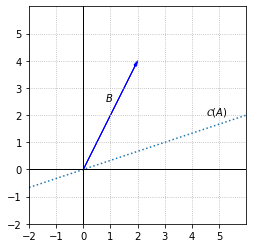

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-6,6,100)

fig, ax = plt.subplots()

options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

ax.arrow(0,0,2,4,fc='b',ec='b',**options)
ax.plot(x,x/3,ls=':')


ax.set_xlim(-2,6)
ax.set_ylim(-2,6)
ax.set_aspect('equal')
ax.set_xticks(np.arange(-2,6,step = 1))
ax.set_yticks(np.arange(-2,6,step = 1))

ax.text(0.8,2.5,'$B$')
ax.text(4.5,2,'$\mathcal{C}(A)$')

ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.grid(True,ls=':')

Let's look at the relationship between $AX$, $B$, and $E$ for an arbitrary vector $X$ in $\mathbb{R}^2$.

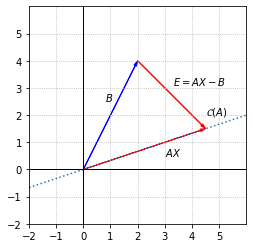

In [4]:
fig, ax = plt.subplots()

options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

ax.arrow(0,0,2,4,fc='b',ec='b',**options)
ax.arrow(0,0,4.5,1.5,fc='r',ec='r',**options)
ax.arrow(2,4,2.5,-2.5,fc='r',ec='r',**options)
ax.plot(x,x/3,ls=':')

ax.set_xlim(-2,6)
ax.set_ylim(-2,6)
ax.set_aspect('equal')
ax.set_xticks(np.arange(-2,6,step = 1))
ax.set_yticks(np.arange(-2,6,step = 1))

ax.text(0.8,2.5,'$B$')
ax.text(4.5,2,'$\mathcal{C}(A)$')
ax.text(3,0.5,'$AX$')
ax.text(3.3,3.1,'$E=AX-B$')

ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.grid(True,ls=':')

We can see that $||E||$ is a measure of the distance between $B$ and a vector in $\mathcal{C}(A)$, and that $||E||$ will be minimized if we choose $X$ so that $E$ is orthogonal to $\mathcal{C}(A)$.  This is the least squares solution we refer to as $\hat{X}$.  The closest vector in $\mathcal{C}(A)$ to $B$ is the *orthogonal projection* of $B$ onto $\mathcal{C}(A)$.  We will use the notation $\hat{B}$ for this projection so that we now have $A\hat{X}=\hat{B}$. 

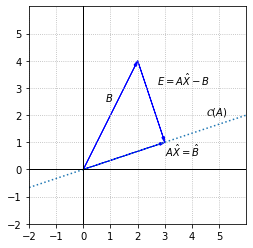

In [5]:
fig, ax = plt.subplots()

options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

ax.arrow(0,0,2,4,fc='b',ec='b',**options)
ax.arrow(0,0,3,1,fc='b',ec='b',**options)
ax.arrow(2,4,1,-3,fc='b',ec='b',**options)
ax.plot(x,x/3,ls=':')

ax.set_xlim(-2,6)
ax.set_ylim(-2,6)
ax.set_aspect('equal')
ax.set_xticks(np.arange(-2,6,step = 1))
ax.set_yticks(np.arange(-2,6,step = 1))

ax.text(0.8,2.5,'$B$')
ax.text(4.5,2,'$\mathcal{C}(A)$')
ax.text(3,0.5,'$A\hat{X}=\hat{B}$')
ax.text(2.7,3.1,'$E=A\hat{X}-B$')

ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.grid(True,ls=':')

In this example, we can use the [projection formula](Inner_Products.ipynb) from the beginning of the chapter to calculate $E$ and $\hat{B}$

$$
\begin{equation}
E = \left[ \begin{array}{r} 1 \\ -3 \end{array} \right] \hspace{2cm} 
\hat{B} = \left[ \begin{array}{r} 3 \\ 1 \end{array} \right]
\end{equation}
$$

To find $\hat{X}$, we solve the system $A\hat{X}=\hat{B}$

$$
\begin{equation}
\left[\begin{array}{rr} 3 & 9 \\ 1 & 3 \end{array}\right]\hat{X} = \left[\begin{array}{r} 3 \\1 \end{array}\right]    
\end{equation}
$$

In this system, the second equation is just a multiple of the first.  This means that $x_1+3x_2 = 1$ is the only constraint on the unknowns, and that we can take $x_2$ to be a free variable.  If we assign $x_2$ a parameter, we can describe all possible solutions as follows.

$$
\begin{eqnarray*}
x_1 & = & 1-3s \\
x_2 & = & s
\end{eqnarray*}
$$

In this particular example, which is meant to show a clear picture of $E$, there is not a unique least squares solution since many vectors solve the matrix equation $A\hat{X}=\hat{B}$.  Inconsistent systems that arise in applications typically do have a unique least squares solution.   

### Normal equations

If we assume for now that the error $E=AX-B$ will have minimum magnitude when it is orthogonal to the column space of $A$, we can use our knowledge of the fundamental subspaces to solve the least squares problem when the column space is of higher dimension.  Recall from a previous section that any vector orthogonal to $\mathcal{C}(A)$ must lie in $\mathcal{N}(A^T)$, the null space of $A^T$.  This means that $A^TE=0$ for the least squares solution.  Filling in $E=AX-B$ gives us the system $A^T(AX-B)=0$, which can be written as $A^TAX=A^TB$.  This system of equations is referred to as the **normal equations**.

### Example 2:  Four inconsistent equations

Although the method of least squares can be applied to any inconsistent system, it is usually associated with systems that have more equations than unknowns.  These systems are called overdetermined, and here is one such example.

$$
\begin{eqnarray*}
2x_1 + x_2 & = & 0 \\
2x_1 - x_2 & = & 2 \\
3x_1 + 2x_2 & = & 1 \\
5x_1 + 2x_2 & = & -2
\end{eqnarray*}
$$

Let $A$ be the $4\times 2$ coefficient matrix, and let $B$ be the vector of the right-hand sides of the equations.  To verify that the system is indeed inconsistent, we can compute the RREF of the augmented matrix $\left[A|B\right]$.

In [6]:
import laguide as lag

A_augmented = np.array([[2, 1, 0],[2, -1, 2],[3, 2, 1],[5,2, -2]])
A_reduced = lag.FullRowReduction(A_augmented)
print(A_reduced)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]


The pivot in the last column indicates that the system is inconsistent.  The two columns of $A$ are linearly independent and form a basis for $\mathcal{C}(A)$, which is a two-dimensional subspace of $\mathbb{R}^4$, but $B$ does not lie in this subspace.  

To find the least squares solution, we will construct and solve the normal equations, $A^TAX = A^TB$.

In [2]:
import laguide as lag

A = np.array([[2, 1],[2, -1],[3, 2],[5,2]])
B = np.array([[0],[2],[1],[-2]])

# Construct A^TA
N_A = A.transpose()@A
# Construct A^TA
N_B = A.transpose()@B
print(N_A,'\n')
print(N_B)


[[42 16]
 [16 10]] 

[[-3]
 [-4]]


The normal equations are a $2\times 2$ system, which can be solved using elimination.


$$
\begin{eqnarray*}
42x_1 + 16x_2 & = & -3 \\
16x_2 + 10x_2 & = & -4 
\end{eqnarray*}
$$


In [8]:
X_hat = lag.SolveSystem(N_A,N_B)
print(X_hat)
print('\n')
E = A@X_hat - B
print("Magnitude of minimum error is:",lag.Magnitude(E))

[[ 0.20731707]
 [-0.73170732]]


Magnitude of minimum error is: 2.5874933722078426


In this example, there is a unique vector $\hat{X}$ that minimizes $||E||$.  Remember from the previous example that $\hat{X}$ is the vector such that $A\hat{X}=\hat{B}$, where $\hat{B}$ is the orthogonal projection of $B$ onto $\mathcal{C}(A)$.  Note however that when we find the solution using the normal equations, we do not actually need to compute $\hat{B}$.

We have not provided proof yet that $\hat{X}$ minimizes $||E||$, but we could provide some numerical evidence by computing $||E||$ for other vectors that are "near" $\hat{X}$.  For example, we might compute $||E||$ for a vector $X$ that has components that are within one of $\hat{X}$.  We will use the $\texttt{random}$ module to generate a typical vector.

In [9]:
P = np.random.rand(2,1)
X = X_hat + P
print(X)
E = A@X - B
print("Magnitude of error is:",lag.Magnitude(E))

[[ 0.43798656]
 [-0.49121813]]
Magnitude of error is: 3.3590740239870116


Running the code in this cell does not prove that $||E||$ is at minimum for $X=\hat{X}$, even if we were to put it in a loop and execute it a million times.  It does allows us to demonstrate some evidence to augment our reasoning.  Another thing we might do to gather evidence is let $X= \delta P$, and plot $||E||$ as a function of $\delta$. 

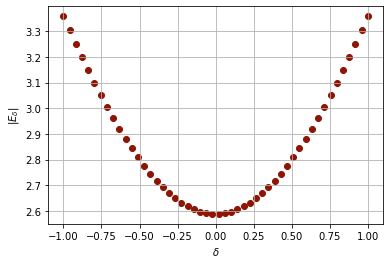

In [19]:
## Set the number of vectors to be tested.
N = 50

delta = np.linspace(-1,1,N)
E_delta = np.linspace(-1,1,N)

## P is the random vector defined in the previous cell.  
## The output of this cell will change with each execution of the previous cell.

for i in range(N):
    X = X_hat + delta[i]*P
    E_delta[i] = lag.Magnitude(A@X-B)
    

fig, ax = plt.subplots()
ax.scatter(delta,E_delta,color='xkcd:brick red');
ax.set_xlabel('$\delta$')
ax.set_ylabel('$|E_{\delta}|$');
ax.grid(True)

### Best approximation

Although numerical evidence and the plot of $B$, $\hat{B}$, and $E$ may convince us that $||E||$ is minimum when $E$ and $\hat{B}$ are orthogonal, we have not yet given proof of the fact.  To accomplish this, we need to show that $||B-Y|| \ge ||B-\hat{B}||$ where $Y$ is an arbitrary vector in $\mathcal{C}(A)$.  This can be explained using properties of the dot product.  

$$
\begin{eqnarray*}
||B-Y||^2 & = & ||(B-\hat{B}) + (\hat{B}-Y)||^2 \\
 & = & \left((B-\hat{B}) + (\hat{B}-Y)\right) \cdot \left((B-\hat{B}) + (\hat{B}-Y)\right) \\
 & = & (B-\hat{B})\cdot (B-\hat{B}) + 2(\hat{B}-Y) \cdot (B-\hat{B}) + (\hat{B}-Y)\cdot(\hat{B}-Y) \\
 & = & ||B-\hat{B}||^2 + ||\hat{B}-Y||^2 \\
 & \ge & ||B-\hat{B}||^2
\end{eqnarray*}
$$

The first key fact is that $(\hat{B}-Y)$ is in $\mathcal{C}(A)$ so $(\hat{B}-Y) \cdot (B-\hat{B}) = 0$.  We also need to observe that magnitudes of vectors can never be negative since they are sums of squares.  Indeed, the only vector with magnitude zero is the vector with all zero entries.  In particular, this means that $||\hat{B}-Y||^2 \ge 0$. 

###  QR factorization to solve normal equations

In this final example, we consider making use of the $QR$ factorization to solve the normal equations.  If we insert $A=QR$ into the normal equations $A^TAX=A^TB$, we will see a simplification.

$$
\begin{eqnarray*}
(QR)^T(QR)X & = & (QR)^TB \\
R^TQ^TQRX & = & R^TQ^TB  \\
R^TRX & = &  R^TQ^TB \\
RX & = & Q^TB
\end{eqnarray*}
$$

The system $RX=Q^TB$ is triangular and can be solved with back substitution.  Note that this approach replaces elimination ($LU$ factorization) with $QR$ factorization.

In [11]:
Q,R = lag.QRFactorization(A)
QTB = Q.transpose()@B
X_hat = lag.BackSubstitution(R,QTB)
print(X_hat)

[[ 0.20731707]
 [-0.73170732]]


### Exercises

**Exercise 1:** (3 pts) Verify that the following system is inconsistent, then find the least squares solution.

$$
\begin{eqnarray*}
    x_2 + x_3 & = & 3 \\
3x_1 - x_2 - 2x_3 & = & 2 \\
x_1 - 2x_2 - x_3 & = & 1 \\
4x_1 + 2x_2 + 4x_3 & = & 0
\end{eqnarray*}
$$

In [1]:
## Code solution here.

**Exercise 2:** (3 pts) Another way find the least squares solution to an inconsistent system is to find $\hat{B}$ by projecting $B$ onto $\mathcal{C}(A)$ and then solving $A\hat{X}=\hat{B}$ directly.  (*Review [Orthogonal Subspaces](Orthogonal_Subspaces.ipynb) for how compute this projection.*)  Demonstrate the entire calculation using $A$ and $B$ from **Example 2**.

In [1]:
## Code solution here.

**Exercise 3:** (2 pts) Explain why an inconsistent system, $AX=B$, does not have a unique least squares solution if the columns of $A$ are linearly dependent.

**Exercise 4:** (3 pts) Demonstrate that the following inconsistent system does not have a unique least squares solution.


$$
\begin{eqnarray*}
    x_2 - x_3 & = & 3 \\
3x_1 - x_2 + 4x_3 & = & 2 \\
x_1 - 2x_2 + 3x_3 & = & 1 \\
4x_1 + 2x_2 + 2x_3 & = & 0
\end{eqnarray*}
$$

In [ ]:
## Code solution here.

**Exercise 5:** (3 pts) If the system $AX = B$ is inconsistent, find the least squares solution to it and determine whether or not the least squares solution is unique.


$$
\begin{equation}
A = \left[\begin{array}{rr} 1 & 2 & 3 \\ 1 & 1 & 1 \\ 2 & 2 & 0 \\ 1 & 2 & 1 \end{array}\right]
\quad\quad
B = \left[\begin{array}{r} 1 \\1 \\ 1 \\ 1 \end{array}\right]  
\end{equation}
$$

In [39]:
## Code solution here

**Exercise 6:** (3 pts) Find the equation of the line that best fits through the three given points:  $(0,2), (0,3)$ and $(1,4)$ in the sense of least squares.

In [40]:
## Code solution here

**Exercise 7:** (3 pts) Find the equation of the parabola that best fits through the given points: $(-1,2), (1,0), (3,1)$ and $(4,2)$ in the sense of least squares.

In [41]:
## Code solution here

**Exercise 8:** (3 pts) Find the least squares solution for the given system $AX = B$ without using the Normal equation. Instead, find the orthogonal projection of $B$ onto $C(A)$ to find the least squares solution. Is the solution unique?

$$
\begin{equation}
A = \left[\begin{array}{rr} 1 & 2 & 2 \\ 2 & 1 & 4 \\ 1 & 2 & 2 \end{array}\right]
\quad\quad
B= \left[\begin{array}{r} 1 \\1 \\ 2 \end{array}\right] 
\end{equation}
$$

In [42]:
## Code solution here

**Exercise 9:** (2 pts) Can you use $QR$ factorization in **Exercise 7** to solve the normal equation ? Explain.

In [43]:
## Code solution here